In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
%reload_ext autoreload

import os
import pandas as pd
import torch
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import repackage
repackage.up()

from modelo_perceptron import *
from utils import *
from fluxdataset import *

In [2]:
epochs = 100
learning_rate = 0.001
alpha = 0.5
beta = 0.5
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
PATH = "../datos/"
TRAIN_FILE = "exoTrain.csv"

In [33]:
df_train = pd.read_csv(f'{PATH}{TRAIN_FILE}', low_memory=False)
df_train['LABEL'] = df_train['LABEL'].add(-1)
df_train.iloc[:, 1:] = reduce_upper_outliers(df_train.iloc[:, 1:], 0.01)
df_train.iloc[:, 1:] = gaussian_filter(df_train.iloc[:, 1:], True)
df_train.iloc[:, 1:] = z_score_normalizing(df_train.iloc[:, 1:])

In [34]:
df_train_x, df_train_y = generate_x_y_df(df_train)

In [35]:
# Usamos SMOTE para generar casos positivos y equilibrar el dataset
sm = SMOTE()
df_train_x, df_train_y = sm.fit_sample(df_train_x, df_train_y)

In [36]:
df_train = pd.DataFrame(df_train_x)
df_train.insert(0, 'LABEL', df_train_y)
df_train['LABEL'].value_counts()

1    5050
0    5050
Name: LABEL, dtype: int64

Vamos a ver alguno de los datos generados

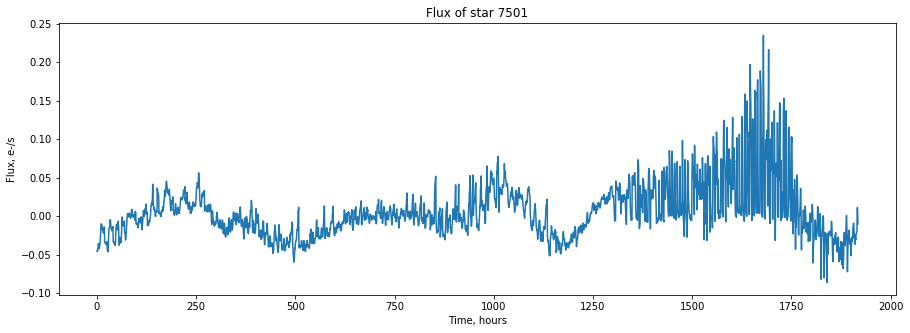

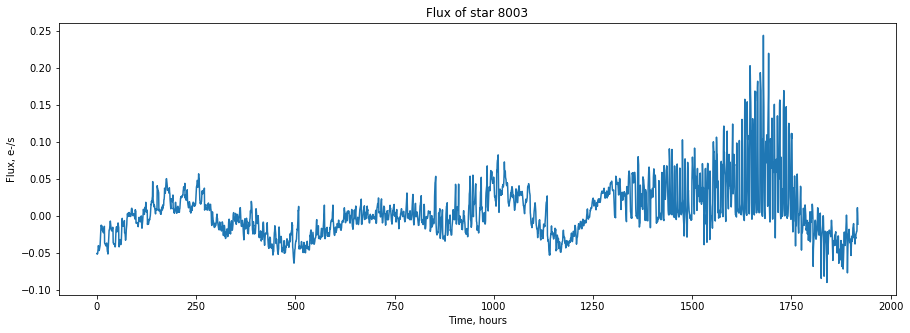

In [44]:
show_flux_plot(df_train.drop('LABEL', axis = 1), [7500])
show_flux_plot(df_train.drop('LABEL', axis = 1), [8002])

In [45]:
validation_proportion = 0.2
df_train, df_validation = split_train_df(df_train, validation_proportion)

In [46]:
modelo = Perceptron().to(device)
model_name = os.getcwd() + "\\saved_models\\perceptron_smote_sgd_cross_diferencia"
criterion = torch.nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.SGD(modelo.parameters(), lr = learning_rate)

In [47]:
train_losses, validation_losses, scores = train_cross(modelo, model_name, criterion, optimizer, epochs, alpha, beta,
                                                df_train, df_validation, device)

using device cuda
Score 0.7368777394294739 at epoch 0
New model saved
Matriz de confusión:
			Predicciones
Valor real	Negativos	Positivos
Negativos	1003		7
Positivos	279		731

Acierto: 0.8584158420562744 Sensibilidad: 0.7237623929977417 Especificidad: 0.9930692911148071 Score: 0.7368777394294739

Epoch: 0 Train loss 0.6640775669181701 Validation loss 0.6065666079521179
Score 0.8837862014770508 at epoch 1
New model saved
Matriz de confusión:
			Predicciones
Valor real	Negativos	Positivos
Negativos	988		22
Positivos	99		911

Acierto: 0.9400990605354309 Sensibilidad: 0.9019802212715149 Especificidad: 0.9782178401947021 Score: 0.8837862014770508

Epoch: 1 Train loss 0.39038645522207904 Validation loss 0.3290146291255951
Score 0.9462859034538269 at epoch 2
New model saved
Matriz de confusión:
			Predicciones
Valor real	Negativos	Positivos
Negativos	998		12
Positivos	43		967

Acierto: 0.9727723002433777 Sensibilidad: 0.9574257135391235 Especificidad: 0.9881188273429871 Score: 0.9462859034538

Score 0.9970319867134094 at epoch 52
Epoch: 52 Train loss 0.0004447128033578986 Validation loss 0.023910969495773315
Score 0.9970319867134094 at epoch 53
Epoch: 53 Train loss 0.0004643999925344297 Validation loss 0.023358378559350967
Score 0.9970319867134094 at epoch 54
Epoch: 54 Train loss 0.0003805927858494296 Validation loss 0.024669110774993896
Score 0.9970319867134094 at epoch 55
Epoch: 55 Train loss 0.00044310327508662007 Validation loss 0.02416667900979519
Score 0.9970319867134094 at epoch 56
Epoch: 56 Train loss 0.000402825126553526 Validation loss 0.02478095330297947
Score 0.9970319867134094 at epoch 57
Epoch: 57 Train loss 0.000411337547668136 Validation loss 0.023625189438462257
Score 0.9970319867134094 at epoch 58
Epoch: 58 Train loss 0.0003692322364538023 Validation loss 0.02452135644853115
Score 0.9970319867134094 at epoch 59
Epoch: 59 Train loss 0.00038447717923929196 Validation loss 0.02450222335755825
Score 0.9970319867134094 at epoch 60
Epoch: 60 Train loss 0.00033562

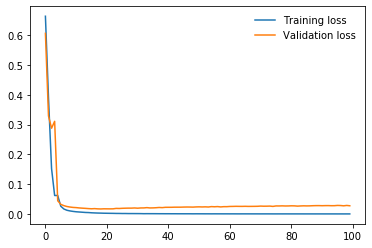

In [48]:
plt.plot(train_losses, label = 'Training loss')
plt.plot(validation_losses, label = 'Validation loss')
plt.legend(frameon = False)

In [12]:
df_train = pd.read_csv(f'{PATH}{TRAIN_FILE}', low_memory=False)
df_train['LABEL'] = df_train['LABEL'].add(-1)
df_train.iloc[:, 1:] = reduce_upper_outliers(df_train.iloc[:, 1:], 0.01)
df_train.iloc[:, 1:] = gaussian_filter(df_train.iloc[:, 1:], False)
df_train.iloc[:, 1:] = z_score_normalizing(df_train.iloc[:, 1:])
df_train_x, df_train_y = generate_x_y_df(df_train)
sm = SMOTE()
df_train_x, df_train_y = sm.fit_sample(df_train_x, df_train_y)
df_train = pd.DataFrame(df_train_x)
df_train.insert(0, 'LABEL', df_train_y)
validation_proportion = 0.2
df_train, df_validation = split_train_df(df_train, validation_proportion)
modelo = Perceptron().to(device)
model_name = os.getcwd() + "\\saved_models\\perceptron_smote_sgd_cross_solo_filtro"
criterion = torch.nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.SGD(modelo.parameters(), lr = learning_rate)

In [13]:
train_losses, validation_losses, scores = train_cross(modelo, model_name, criterion, optimizer, epochs, alpha, beta,
                                                df_train, df_validation, device)

using device cuda
Score 0.9970319867134094 at epoch 0
New model saved
Matriz de confusión:
			Predicciones
Valor real	Negativos	Positivos
Negativos	1007		3
Positivos	0		1010

Acierto: 0.9985148906707764 Sensibilidad: 1.0 Especificidad: 0.997029721736908 Score: 0.9970319867134094

Epoch: 0 Train loss 0.2972176795816141 Validation loss 0.04752137511968613
Score 0.9990101456642151 at epoch 1
New model saved
Matriz de confusión:
			Predicciones
Valor real	Negativos	Positivos
Negativos	1009		1
Positivos	0		1010

Acierto: 0.9995049834251404 Sensibilidad: 1.0 Especificidad: 0.999009907245636 Score: 0.9990101456642151

Epoch: 1 Train loss 0.027437327141956527 Validation loss 0.011855759657919407
Score 0.9990101456642151 at epoch 2
New model saved

Epoch: 2 Train loss 0.013496992969424419 Validation loss 0.006538895424455404
Score 0.9990101456642151 at epoch 3
New model saved

Epoch: 3 Train loss 0.009241173088107959 Validation loss 0.00429741432890296
Score 1.0 at epoch 4
New model saved
Matri

Score 1.0 at epoch 66
Epoch: 66 Train loss 0.0004628702149827882 Validation loss 0.0001149745294242166
Score 1.0 at epoch 67
New model saved

Epoch: 67 Train loss 0.0006231972707970308 Validation loss 9.531649993732572e-05
Score 1.0 at epoch 68
Epoch: 68 Train loss 0.0005691070957939224 Validation loss 0.00014143403677735478
Score 1.0 at epoch 69
New model saved

Epoch: 69 Train loss 0.00028905657553436733 Validation loss 9.458318527322263e-05
Score 1.0 at epoch 70
Epoch: 70 Train loss 0.0004068700504480022 Validation loss 9.820832929108292e-05
Score 1.0 at epoch 71
Epoch: 71 Train loss 0.0003841257921539911 Validation loss 9.86103987088427e-05
Score 1.0 at epoch 72
New model saved

Epoch: 72 Train loss 0.00030963792290427896 Validation loss 9.202562068821862e-05
Score 1.0 at epoch 73
New model saved

Epoch: 73 Train loss 0.0003555915253882361 Validation loss 8.856618660502136e-05
Score 1.0 at epoch 74
New model saved

Epoch: 74 Train loss 0.0003261949350633244 Validation loss 8.752416

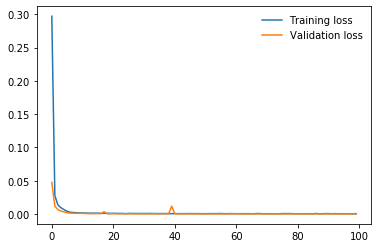

In [14]:
plt.plot(train_losses, label = 'Training loss')
plt.plot(validation_losses, label = 'Validation loss')
plt.legend(frameon = False)

In [21]:
df_train = pd.read_csv(f'{PATH}{TRAIN_FILE}', low_memory=False)
df_train['LABEL'] = df_train['LABEL'].add(-1)
df_train.iloc[:, 1:] = reduce_upper_outliers(df_train.iloc[:, 1:], 0.01)
df_train.iloc[:, 1:] = gaussian_filter(df_train.iloc[:, 1:], True)
df_train.iloc[:, 1:] = z_score_normalizing(df_train.iloc[:, 1:])
df_train_x, df_train_y = generate_x_y_df(df_train)
sm = SMOTE()
df_train_x, df_train_y = sm.fit_sample(df_train_x, df_train_y)
df_train = pd.DataFrame(df_train_x)
df_train.insert(0, 'LABEL', df_train_y)
validation_proportion = 0.2
df_train, df_validation = split_train_df(df_train, validation_proportion)
modelo = Perceptron().to(device)
model_name = os.getcwd() + "\\saved_models\\perceptron_smote_adam_cross_diferencia"
criterion = torch.nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.Adam(modelo.parameters(), lr = learning_rate)

In [22]:
train_losses, validation_losses, scores = train_cross(modelo, model_name, criterion, optimizer, epochs, alpha, beta,
                                                df_train, df_validation, device)

using device cuda
Score 0.9842212200164795 at epoch 0
New model saved
Matriz de confusión:
			Predicciones
Valor real	Negativos	Positivos
Negativos	994		16
Positivos	0		1010

Acierto: 0.9920792579650879 Sensibilidad: 1.0 Especificidad: 0.9841583967208862 Score: 0.9842212200164795

Epoch: 0 Train loss 0.1396855949322776 Validation loss 0.04042334854602814
Score 0.9881541728973389 at epoch 1
New model saved
Matriz de confusión:
			Predicciones
Valor real	Negativos	Positivos
Negativos	998		12
Positivos	0		1010

Acierto: 0.9940594434738159 Sensibilidad: 1.0 Especificidad: 0.9881188273429871 Score: 0.9881541728973389

Epoch: 1 Train loss 0.03476537079478287 Validation loss 0.027006352320313454
Score 0.9950556755065918 at epoch 2
New model saved
Matriz de confusión:
			Predicciones
Valor real	Negativos	Positivos
Negativos	1005		5
Positivos	0		1010

Acierto: 0.9975247979164124 Sensibilidad: 1.0 Especificidad: 0.9950494766235352 Score: 0.9950556755065918

Epoch: 2 Train loss 0.1858472544534487

Score 0.9901235103607178 at epoch 64
Epoch: 64 Train loss 0.0087176910426357 Validation loss 0.03218197822570801
Score 0.9901235103607178 at epoch 65
Epoch: 65 Train loss 0.00871581243406428 Validation loss 0.03219439089298248
Score 0.9901235103607178 at epoch 66
Epoch: 66 Train loss 0.008721368088580594 Validation loss 0.032279063016176224
Score 0.9901235103607178 at epoch 67
Epoch: 67 Train loss 0.008705031458694156 Validation loss 0.032579872757196426
Score 0.9901235103607178 at epoch 68
Epoch: 68 Train loss 0.008785263087489817 Validation loss 0.03255138546228409
Score 0.9901235103607178 at epoch 69
Epoch: 69 Train loss 0.008788743025005454 Validation loss 0.032457385212183
Score 0.9901235103607178 at epoch 70
Epoch: 70 Train loss 0.0087305483251515 Validation loss 0.03228560835123062
Score 0.9901235103607178 at epoch 71
Epoch: 71 Train loss 0.008727226871075017 Validation loss 0.0320989191532135
Score 0.9901235103607178 at epoch 72
Epoch: 72 Train loss 0.008747015318067947 Validat

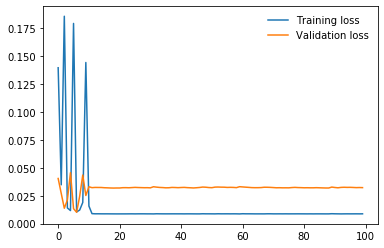

In [28]:
plt.plot(train_losses, label = 'Training loss')
plt.plot(validation_losses, label = 'Validation loss')
plt.legend(frameon = False)

In [18]:
df_train = pd.read_csv(f'{PATH}{TRAIN_FILE}', low_memory=False)
df_train['LABEL'] = df_train['LABEL'].add(-1)
df_train.iloc[:, 1:] = reduce_upper_outliers(df_train.iloc[:, 1:], 0.01)
df_train.iloc[:, 1:] = gaussian_filter(df_train.iloc[:, 1:], False)
df_train.iloc[:, 1:] = z_score_normalizing(df_train.iloc[:, 1:])
df_train_x, df_train_y = generate_x_y_df(df_train)
sm = SMOTE()
df_train_x, df_train_y = sm.fit_sample(df_train_x, df_train_y)
df_train = pd.DataFrame(df_train_x)
df_train.insert(0, 'LABEL', df_train_y)
validation_proportion = 0.2
df_train, df_validation = split_train_df(df_train, validation_proportion)
modelo = Perceptron().to(device)
model_name = os.getcwd() + "\\saved_models\\perceptron_smote_adam_cross_solo_filtro"
criterion = torch.nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.Adam(modelo.parameters(), lr = learning_rate)

In [19]:
train_losses, validation_losses, scores = train_cross(modelo, model_name, criterion, optimizer, epochs, alpha, beta,
                                                df_train, df_validation, device)

using device cuda
Score 0.9980207681655884 at epoch 0
New model saved
Matriz de confusión:
			Predicciones
Valor real	Negativos	Positivos
Negativos	1008		2
Positivos	0		1010

Acierto: 0.999009907245636 Sensibilidad: 1.0 Especificidad: 0.998019814491272 Score: 0.9980207681655884

Epoch: 0 Train loss 0.049914409206041344 Validation loss 0.004344036802649498
Score 0.9990101456642151 at epoch 1
New model saved
Matriz de confusión:
			Predicciones
Valor real	Negativos	Positivos
Negativos	1009		1
Positivos	0		1010

Acierto: 0.9995049834251404 Sensibilidad: 1.0 Especificidad: 0.999009907245636 Score: 0.9990101456642151

Epoch: 1 Train loss 0.01202855071071351 Validation loss 0.0026632975786924362
Score 0.9970319867134094 at epoch 2
Epoch: 2 Train loss 0.014405086095903604 Validation loss 0.003947541583329439
Score 0.9822576642036438 at epoch 3
Epoch: 3 Train loss 0.01800734878651392 Validation loss 0.009594197385013103
Score 0.9990101456642151 at epoch 4
New model saved

Epoch: 4 Train loss 0

Score 1.0 at epoch 87
Epoch: 87 Train loss 0.0 Validation loss 0.0
Score 1.0 at epoch 88
Epoch: 88 Train loss 0.0 Validation loss 0.0
Score 1.0 at epoch 89
Epoch: 89 Train loss 0.0 Validation loss 0.0
Score 1.0 at epoch 90
Epoch: 90 Train loss 0.0 Validation loss 0.0
Score 1.0 at epoch 91
Epoch: 91 Train loss 0.0 Validation loss 0.0
Score 1.0 at epoch 92
Epoch: 92 Train loss 0.0 Validation loss 0.0
Score 1.0 at epoch 93
Epoch: 93 Train loss 0.0 Validation loss 0.0
Score 1.0 at epoch 94
Epoch: 94 Train loss 0.0 Validation loss 0.0
Score 1.0 at epoch 95
Epoch: 95 Train loss 0.0 Validation loss 0.0
Score 1.0 at epoch 96
Epoch: 96 Train loss 0.0 Validation loss 0.0
Score 1.0 at epoch 97
Epoch: 97 Train loss 0.0 Validation loss 0.0
Score 1.0 at epoch 98
Epoch: 98 Train loss 0.0 Validation loss 0.0
Score 1.0 at epoch 99
Epoch: 99 Train loss 0.0 Validation loss 0.0
Epoch: 99 Train loss 0.0 Validation loss 0.0
Best score 1.0
execution time 6963.699808400001


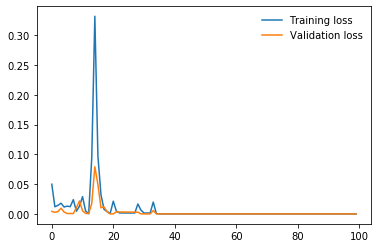

In [20]:
plt.plot(train_losses, label = 'Training loss')
plt.plot(validation_losses, label = 'Validation loss')
plt.legend(frameon = False)